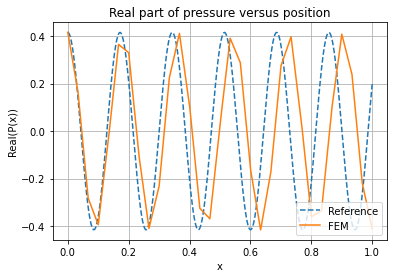

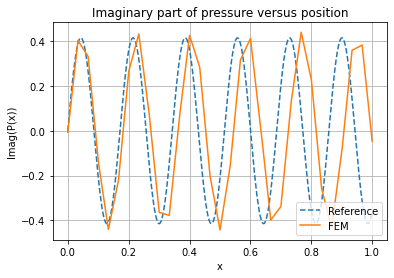

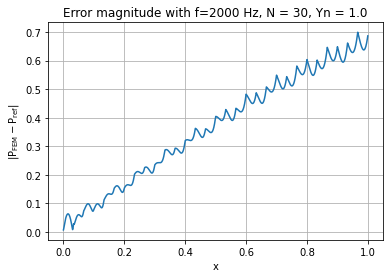

In [2]:
import numpy as np

# Acoustical parameters:
f = 2000                # Frequency in Hertz
c0 = 343                # Speed of sound in air in meters per second
rho0 = 1.21             # Density of air in kg/m^3
k = 2 * np.pi * f / c0        # Wavenumber in rads/m
Yn = 1.0                # Normalised specific admittance of material at x=1
U0 = 0.001              # Amplitude of piston velocity (m/s)

# Mesh parameters:
N = 30                  # Number of elements
h = 1 / N                 # Element size
x = np.arange(0, 1, h / 100)  # Array of x values to compare FEM and analytical models at

## FEM Model

# Stiffness matrix:
K = (2/h) * np.diag(np.ones(N+1)) - (1/h)*np.diag(np.ones(N),1) - (1/h)*np.diag(np.ones(N),-1) 
K[0,0] = 1/h
K[N,N] = 1/h

# Mass matrix:
M = (2*h/3) * np.diag(np.ones(N+1)) + (h/6)*np.diag(np.ones(N),1) + (h/6)*np.diag(np.ones(N),-1)
M[0,0] = h/3
M[N,N] = h/3 

# Damping matrix:
D = np.zeros((N+1,N+1))
D[N,N] = Yn

# Work vectors:
w = np.zeros((N+1))
w[0] = rho0*c0*U0

# Solve for pressure at the node points
pNode = np.linalg.solve(k**2*M + 1j*k*D - K, 1j*k*w)

# Compute pressure at all values of x using linear interpolation:
pFEM = np.interp(x, np.arange(0,1+h/100,h), np.squeeze(pNode))

## Analytical reference solution

R = (1-Yn)/(1+Yn)           # Reflection coefficient at x=1
A = rho0*c0*U0 / (1 - np.exp(2j*k)*R)
B = np.exp(2j*k)*R*A
pRef = A*np.exp(1j*k*x) + B*np.exp(-1j*k*x)

## Investigate the accuracy of FEM versus the Reference Solution:

# Compute normalised RMS error:
Normalised_RMS_Error = np.sqrt(np.mean(abs(pFEM-pRef)**2)) / np.sqrt(np.mean(abs(pRef)**2))

# Plot the difference
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(x, np.real(pRef), '--', label='Reference')
plt.plot(x, np.real(pFEM), label='FEM')
plt.xlabel('x')
plt.ylabel('Real(P(x))')
plt.legend(loc='lower right')
plt.title('Real part of pressure versus position')
plt.grid(True)
plt.figure(figsize=(10,4))
plt.plot(x, np.imag(pRef), '--', label='Reference')
plt.plot(x, np.imag(pFEM), label='FEM')
plt.xlabel('x')
plt.ylabel('Imag(P(x))')
plt.legend(loc='lower right')
plt.title('Imaginary part of pressure versus position')
plt.grid(True)
plt.figure(figsize=(10,4))
plt.plot(x,np.abs(pRef-pFEM))
plt.xlabel('x')
plt.ylabel('|$\mathregular{P_{FEM} - P_{ref}}$|')
plt.title('Error magnitude with f={} Hz, N = {}, Yn = {}'.format(f,N,Yn))
plt.grid(True)
plt.show()